<a href="https://colab.research.google.com/github/antonvandike/Algoritmos-Geneticos/blob/main/Libro_Eyal_Wirsansky/Handson_chapter_4_2_tsp_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Solucion del problema del agente de ventas viajero

###Configuraciones y definiciones

In [20]:
pip install deap

In [21]:
pip install tsplib95

In [22]:
## Paso 1: Modulos
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random as rd
import array as arr

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tsplib95
import elitism

In [23]:
## Paso 2: Crear una instancia de las caracteristicas del problema

with open('bayg29.tsp') as f:
  text = f.read()

tsp = tsplib95.parse(text)

In [24]:
## Paso 2: Parametros del problema

# Contenido del problema del agente viajero

POPULATION_SIZE = 300     # Tamaño de la poblacion de individuos
P_CROSSOVER     =  0.9    # Probabilidad de cruza
P_MUTATION      =  0.05    # Probabilidad de mutación

MAX_GENERATIONS = 200     # Maximo numero de generaciones (condición de termino)

In [25]:
HALL_OF_FAME_SIZE = 30

In [26]:
## Paso 3: Elementos aleatorios

RANDOM_SEED = 42          # Comunmente cuando se experimenta con un codigo
rd.seed(RANDOM_SEED)      # se corre el problema con los mismos parametros
                          # para repetir y compara resultados

In [27]:
## Paso 4: Declarando el cromosoma
toolbox = base.Toolbox()
toolbox.register("randomOrder", rd.sample, range(tsp.dimension), tsp.dimension)

In [28]:
## Paso 5: Crear la funcion de aptitud (FITNESS)

# Se indica maximizacion y un solo peso
creator.create('FitnessMin', base.Fitness, weights = (-1.0,))

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [29]:
## Paso 6: Crear la funcion de  aptitud del individuo

creator.create("Individual", arr.array, typecode='i', fitness=creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [30]:
## Paso 7: Declarar el operador para generador de individuos

toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

In [31]:
## Paso 8: Declarar el operador para generar la poblacion

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [32]:
# Funcion para calcular la distancia
def TotalDistance(indices):

  distancia = 0
  for x in range(-1,len(indices)-1):

    edge = indices[x]+1,indices[x+1]+1
    distancia = distancia + tsp.get_weight(*edge)

  return distancia

In [33]:
## Paso 9: Definir función para calcular la aptitud
def tpsDistance(individual):

  return TotalDistance(individual),  # return a tuple

In [34]:
## Paso 10: Declarar el operador de evaluacion

toolbox.register("evaluate", tpsDistance)

In [35]:
## Paso 11: Declarar los operadores geneticos

toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 1.0/tsp.dimension)

###Evolucionando la solución

In [36]:
def TSP_problem():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with hof feature added:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print best individual info:
    best = hof.items[0]
    print("-- Best Ever Individual = ", best)
    print("-- Solución exacta al problema bayg29 = ", 1610)
    print("-- Best Ever Fitness = ", best.fitness.values[0])


    # plot statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
    plt.figure(2)
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.title('Min and Average fitness over Generations')
    plt.show()

    colores = ["*b-","*m-"]
    plt.figure(figsize=(12, 8))
    ax1 = plt.subplot(2,3,1)
    ax2 = plt.subplot(2,3,2)

    axes = [ax1, ax2]



    color = 0

    optimalSolution = [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]
    c = [best,optimalSolution]

    for y1 in range(2):
      for x in range(-1,tsp.dimension-1):
        a = tsp.display_data[c[y1][x]+1]
        b = tsp.display_data[c[y1][x+1]+1]
        axes[y1].plot([a[0],b[0]],[a[1],b[1]],colores[y1])

    # show both plots:
    plt.title('Comparación de la solución\nobtenida y la solución real')
    plt.show()




gen	nevals	min 	avg   
0  	300   	3438	4713.8
1  	246   	3438	4448.24
2  	243   	3438	4240.04
3  	239   	3419	4068.53
4  	248   	3111	3929.5 
5  	245   	3111	3837.67
6  	247   	3045	3718.86
7  	232   	2932	3645.5 
8  	251   	2773	3522.12
9  	255   	2773	3438.71
10 	254   	2773	3386.11
11 	256   	2734	3318.67
12 	243   	2641	3230.36
13 	250   	2541	3146.02
14 	247   	2541	3101.32
15 	248   	2518	3040.34
16 	250   	2438	3036.2 
17 	247   	2362	2977.15
18 	241   	2362	2932.7 
19 	236   	2362	2882.89
20 	238   	2256	2832.88
21 	238   	2256	2755.3 
22 	246   	2249	2716.84
23 	252   	2085	2662.8 
24 	245   	2085	2601.83
25 	242   	2085	2566.45
26 	237   	2085	2507.64
27 	240   	2038	2475.8 
28 	245   	1996	2433.48
29 	244   	1978	2401.44
30 	257   	1978	2361.79
31 	237   	1917	2305.64
32 	248   	1870	2253.96
33 	252   	1870	2204.04
34 	250   	1870	2189.68
35 	253   	1838	2134.98
36 	244   	1808	2094.84
37 	237   	1793	2076.1 
38 	232   	1793	2027.88
39 	238   	1793	2017.46
40 	246   	1752	19

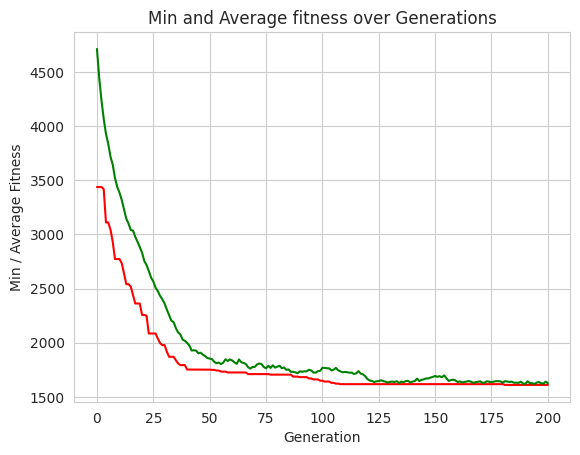

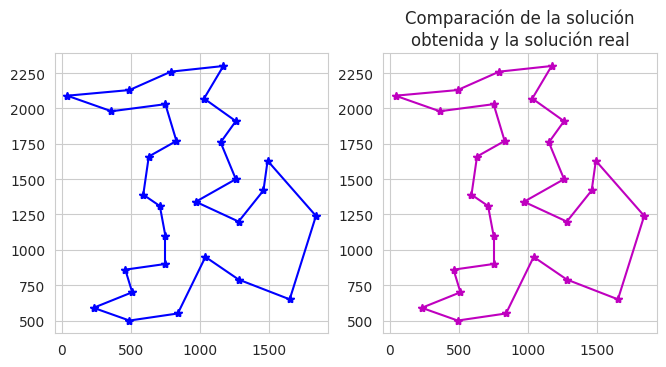

In [42]:
TSP_problem()